In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
df1 = pd.read_csv('data/train_transaction.csv')
df2 = pd.read_csv('data/train_identity.csv')
df1.index = df1['TransactionID']
df2.index = df2['TransactionID']

In [3]:
del df1['TransactionID']
del df2['TransactionID']

In [4]:
df1.sample(10)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,
2998978,0,344109,107.950,W,5017,432.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271150,0,6972258,117.000,W,14057,310.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3073610,0,1820680,49.950,W,17966,356.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037722,0,1197872,947.000,W,14813,165.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3442553,0,11649713,117.000,W,8320,476.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3055386,0,1545314,49.555,C,9633,296.0,185.0,visa,138.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3019143,0,785987,60.000,H,14182,562.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3279347,0,7223384,117.000,W,9500,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3345207,0,8880125,104.768,C,15146,311.0,185.0,visa,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2.sample(10)

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3388860,-20.0,424153.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
3062925,0.0,28634.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,safari generic,24.0,1440x900,match_status:2,T,T,T,T,desktop,MacOS
3232654,-35.0,165549.0,NaN,NaN,2.0,-5.0,NaN,NaN,0.0,0.0,...,ie 11.0 for desktop,NaN,NaN,NaN,F,F,F,F,NaN,rv:11.0
3406252,-20.0,522533.0,NaN,NaN,2.0,-26.0,NaN,NaN,NaN,NaN,...,mobile safari generic,NaN,NaN,NaN,F,F,F,F,mobile,NaN
3295441,0.0,623.0,0.0,0.0,1.0,-9.0,NaN,NaN,0.0,0.0,...,chrome 59.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,NaN
3096167,0.0,77618.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,iOS Device
3126119,-5.0,115082.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3024851,-5.0,212922.0,NaN,NaN,2.0,-8.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
3566143,-20.0,72298.0,NaN,NaN,0.0,-30.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,NaN,NaN,NaN,F,F,F,F,mobile,NaN


In [6]:
df = df1.join(df2)
del df1
del df2

In [7]:
categoricalColumns = df.columns[df.dtypes==object]
numericColumns = df.columns[df.dtypes!=object]
categoricalColumns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

(array([108.,  69.,  19.,   0.,  14.,   1.,   1., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

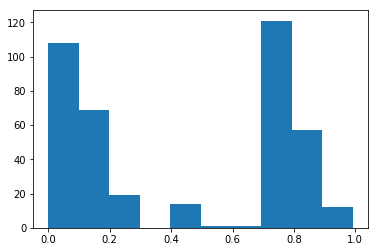

In [8]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [9]:
lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
midPercentColumns = numericColumns[(percentNa > .3) & (percentNa < .7)]
midAndLowPercentColumns = numericColumns[percentNa < .7]

In [10]:
for column in lowPercentColumns:
    df[column] = df[column].fillna(df[column].mean())

In [11]:
for column in midPercentColumns:
    df["%s_isnan"%column] = df[column].isna()
    df[column] = df[column].fillna(df[column].mean())

(array([212.,   0.,   0.,   0.,   0.,   0.,   0., 121.,  57.,  12.]),
 array([0.        , 0.09919616, 0.19839232, 0.29758848, 0.39678464,
        0.4959808 , 0.59517696, 0.69437312, 0.79356928, 0.89276544,
        0.99196159]),
 <a list of 10 Patch objects>)

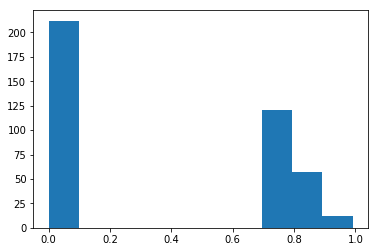

In [12]:
percentNa = df[numericColumns].isna().sum()/ len(df)
plt.hist(percentNa)

In [13]:
categoricalColumnsExceptEmail = set(categoricalColumns)#.to_list()
categoricalColumnsExceptEmail.remove('P_emaildomain')
categoricalColumnsExceptEmail.remove('R_emaildomain')
#del categoricalColumnsExceptEmail[3:5]

In [14]:
categoricalOptions = {column: set() for column in categoricalColumnsExceptEmail}
for column in categoricalColumnsExceptEmail:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])

In [17]:
print(categoricalOptions)
np.sort([len(value) for key, value in categoricalOptions.items()])

{'DeviceType': {nan, 'desktop', 'mobile'}, 'M8': {nan, 'T', 'F'}, 'id_36': {nan, 'T', 'F'}, 'id_35': {nan, 'T', 'F'}, 'M7': {nan, 'T', 'F'}, 'id_30': {nan, 'Windows 10', 'Windows 7'}, 'id_28': {nan, 'New', 'Found'}, 'M3': {nan, 'T', 'F'}, 'M5': {nan, 'T', 'F'}, 'ProductCD': {'C', 'S', 'H', 'R', 'W'}, 'id_29': {nan, 'NotFound', 'Found'}, 'id_27': {nan}, 'M9': {nan, 'T', 'F'}, 'id_16': {nan, 'NotFound', 'Found'}, 'id_37': {nan, 'T', 'F'}, 'card4': {'mastercard', 'american express', 'visa', 'discover'}, 'M6': {nan, 'T', 'F'}, 'id_23': {nan}, 'id_15': {nan, 'New', 'Unknown', 'Found'}, 'card6': {'credit', 'debit'}, 'M4': {'M0', nan, 'M2', 'M1'}, 'M2': {nan, 'T', 'F'}, 'M1': {nan, 'T'}, 'id_33': {nan, '1366x768', '1920x1080', '1334x750'}, 'DeviceInfo': {nan, 'iOS Device', 'Windows', 'Trident/7.0', 'MacOS'}, 'id_34': {nan, 'match_status:2', 'match_status:1'}, 'id_12': {nan, 'NotFound', 'Found'}, 'id_31': {nan, 'chrome 62.0', 'mobile safari 11.0', 'chrome 64.0', 'safari generic', 'chrome 63.0'

array([1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 5, 5, 9])

In [32]:
dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
dfCategoricalExceptEmailDummied.columns

Index(['id_29_Found', 'id_29_NotFound', 'id_30_other', 'id_16_Found',
       'id_16_NotFound', 'id_28_Found', 'id_28_other', 'id_12_Found',
       'id_12_NotFound', 'DeviceType_other', 'id_23_other', 'id_31_other',
       'id_37_other', 'id_36_other', 'M5_other', 'M6_other', 'M2_other',
       'ProductCD_other', 'id_35_other', 'M3_other', 'id_15_Found',
       'id_15_other', 'M4_other', 'M8_other', 'id_33_other', 'M7_other',
       'id_34_other', 'M1_other', 'id_27_other', 'id_38_other', 'card6_other',
       'DeviceInfo_other', 'card4_other', 'M9_other'],
      dtype='object')

In [26]:
dfEmails = df[['P_emaildomain', 'R_emaildomain']]

In [27]:
#getEmailService = lambda x: x.split('.', maxsplit=1)[0] if type(x)==str else ''
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)

In [29]:
emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
emailOptions = {column: set() for column in emailColumns}
for column in emailColumns:
    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])

In [30]:
print(emailOptions)

{'P_emailservice': {'', 'hotmail', 'anonymous', 'comcast', 'icloud', 'gmail', 'aol', 'yahoo'}, 'P_emaildomain': {'', 'com', 'net'}, 'R_emailservice': {'', 'hotmail', 'anonymous', 'gmail', 'yahoo'}, 'R_emaildomain': {'', 'com'}}


In [20]:
dfEmailDummied = pd.get_dummies(df[emailColumns])

In [21]:
dfEmailDummied.columns

Index(['P_emailservice_other', 'P_emaildomain_other', 'R_emailservice_other',
       'R_emaildomain_other'],
      dtype='object')

In [22]:
print(dfEmailDummied.shape)
print(dfCategoricalExceptEmailDummied.shape)
print(df[midAndLowPercentColumns].shape)

(590540, 4)
(590540, 33)
(590540, 212)


In [23]:
df_concat = pd.concat([df[midAndLowPercentColumns], dfEmailDummied, dfCategoricalExceptEmailDummied], axis=1)

In [45]:
#with open('dataframe.pd', 'wb') as f:
#    pickle.dump(df_concat, f)

In [25]:
len(df_concat.columns)

249

In [26]:
with open('columns', 'rb') as f:
    columns = pickle.load(f)

In [28]:
len(columns)

313

In [32]:
a = set(columns)
b = set(df_concat.columns)

In [35]:
a - b

{'DeviceInfo_MacOS',
 'DeviceInfo_Trident/7.0',
 'DeviceInfo_Windows',
 'DeviceInfo_iOS Device',
 'DeviceType_desktop',
 'DeviceType_mobile',
 'M1_T',
 'M2_F',
 'M2_T',
 'M3_F',
 'M3_T',
 'M4_M0',
 'M4_M1',
 'M4_M2',
 'M5_F',
 'M5_T',
 'M6_F',
 'M6_T',
 'M7_F',
 'M7_T',
 'M8_F',
 'M8_T',
 'M9_F',
 'M9_T',
 'P_emaildomain_',
 'P_emaildomain_com',
 'P_emaildomain_net',
 'P_emailservice_',
 'P_emailservice_anonymous',
 'P_emailservice_aol',
 'P_emailservice_comcast',
 'P_emailservice_gmail',
 'P_emailservice_hotmail',
 'P_emailservice_icloud',
 'P_emailservice_yahoo',
 'R_emaildomain_',
 'R_emaildomain_com',
 'R_emailservice_',
 'R_emailservice_anonymous',
 'R_emailservice_gmail',
 'R_emailservice_hotmail',
 'R_emailservice_yahoo',
 'card4_american express',
 'card4_discover',
 'card4_mastercard',
 'card4_visa',
 'card6_credit',
 'card6_debit',
 'id_12_Found',
 'id_12_NotFound',
 'id_15_Found',
 'id_15_New',
 'id_15_Unknown',
 'id_16_Found',
 'id_16_NotFound',
 'id_28_Found',
 'id_28_New'

In [36]:
b-a

{'DeviceType_other',
 'M2_other',
 'M3_other',
 'M4_other',
 'M5_other',
 'M6_other',
 'M7_other',
 'M8_other',
 'M9_other',
 'id_12_other',
 'id_15_other',
 'id_16_other',
 'id_28_other',
 'id_29_other',
 'id_35_other',
 'id_36_other',
 'id_37_other',
 'id_38_other'}

In [37]:
a.remove('isFraud')